In [1]:
from gp_1D import *


In [2]:
input_file = '../training_results/1D_500/train_inputs.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
output_type = 'T'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type,\
           output_file = output_file, output_type = output_type,\
           var_file = var_file, train_frac=0.2)

In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l =  0.1 var =  1.8531666989242075


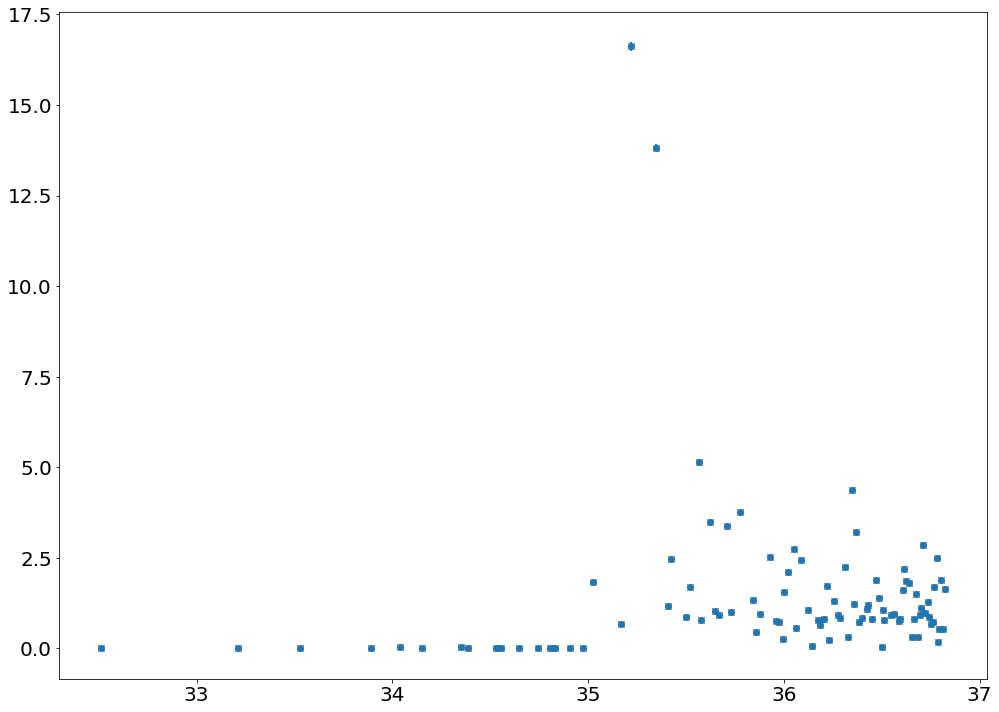

In [6]:
Y_star, err = gp.noise_GP_predict(gp.X_train, get_err = True)
X_s = gp.X_train.flatten()
Y_s = Y_star.flatten()
plt.errorbar(X_s, Y_s, yerr = err.flatten(), fmt="o")
plt.plot(gp.X_train, np.exp(gp.noise_train), 'kx')

In [7]:
gp.optimise_GP()

l =  0.24769867738841966 var =  9.069210351535695


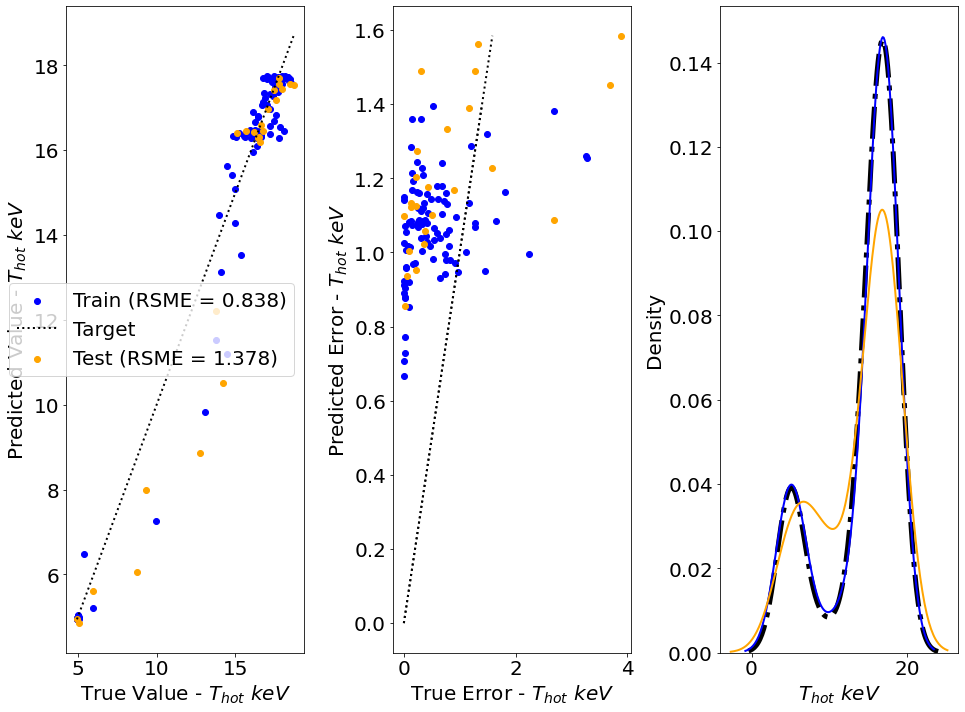

In [8]:
gp.test_train_plot()

In [9]:
X_star = np.geomspace(1e15, 1e17, 100)[:,None]


Y_star, V_epi, V_noise = gp.GP_predict(X_star, get_var=True)

In [10]:
X = np.exp(gp.get_input())
if output_type == 'T':
    Y = gp.get_output()
else:
    Y = np.exp(gp.get_output())

In [11]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [12]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


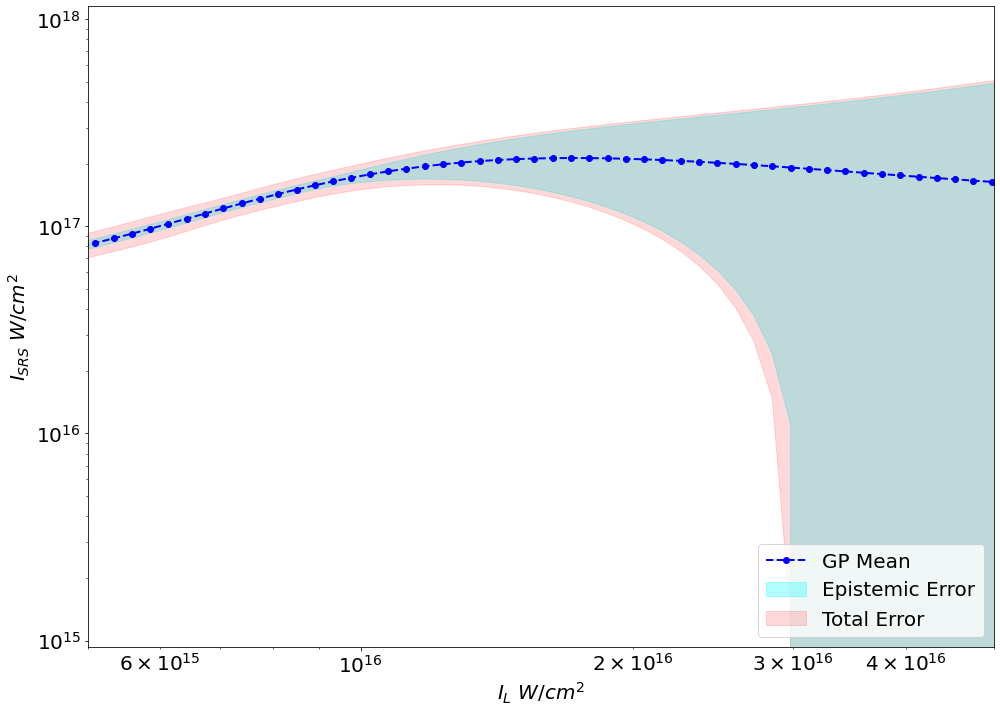

In [13]:
plt.rcParams["figure.figsize"] = [14, 10]

error_epi = 2.0*np.sqrt(V_epi)
error_tot = 2.0*np.sqrt(V_epi + V_noise)

Y_s = Y_star.flatten()
X_s = X_star.flatten()

fig, ax1 = plt.subplots()
ax1.loglog(X_s, Y_s*X_s,'--o', color = 'blue', label = 'GP Mean')
ax1.fill_between(X_s, (Y_s-error_epi)*X_s, (Y_s+error_epi)*X_s, alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
ax1.fill_between(X_s, (Y_s-error_tot)*X_s, (Y_s+error_tot)*X_s, alpha = 0.15, color = 'red', label = 'Total Error')
# ax1.plot(X_all, Y_all*X_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.5)
# ax1.plot(X, Y*X, 'kx', color = 'blue', label = 'Mean Samples', alpha = 0.7)
ax1.set_xlim(5e15, 5e16)

# ax1.set_ylim(2e10, 1e16)
ax1.set_ylabel(r'$I_{SRS} \,\, W/cm^{2}$')
ax1.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')
ax1.legend(loc = 'lower right')



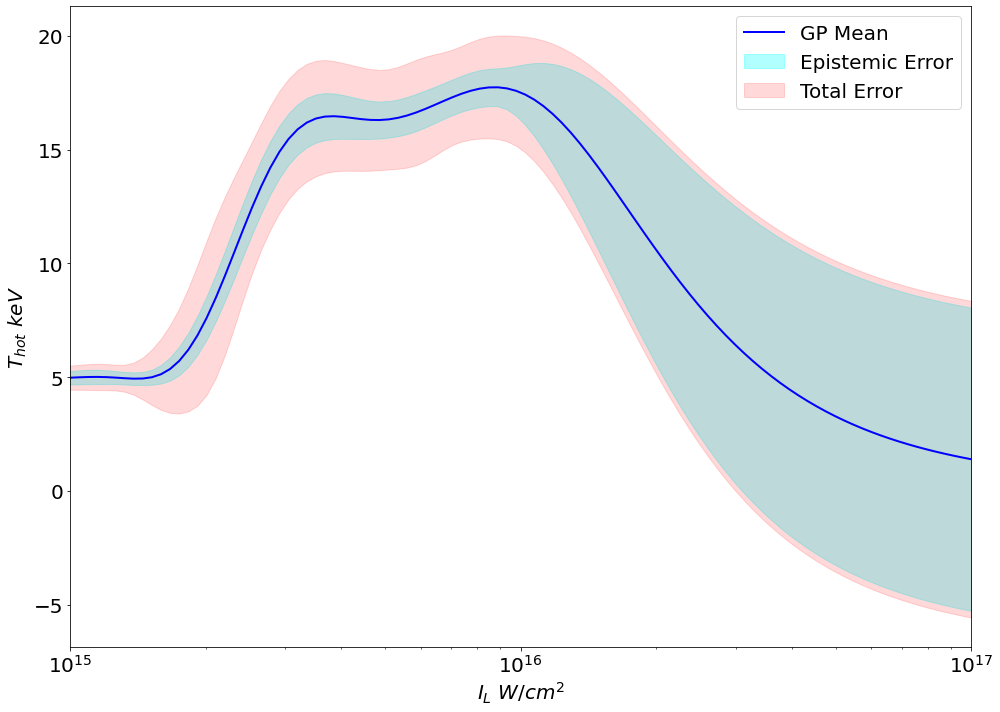

In [20]:
plt.rcParams["figure.figsize"] = [14, 10]

error_epi = 2.0*np.sqrt(V_epi)
error_tot = 2.0*np.sqrt(V_epi + V_noise)

Y_s = Y_star.flatten()
X_s = X_star.flatten()

fig, ax1 = plt.subplots()
ax1.semilogx(X_s, Y_s, color = 'blue', label = 'GP Mean')
ax1.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
ax1.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
# ax1.plot(X_all, Y_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.6)
# ax1.plot(X, Y, 'kx', color = 'blue', label = 'Mean Samples', alpha = 0.6)
ax1.set_xlim(1e15, 1e17)
# ax1.set_ylim(0, 0.5)

ax1.set_ylabel(r'$T_{hot} \,\, keV$')
ax1.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')
ax1.legend(loc = 'upper right')



In [15]:
idx = np.where(np.abs(np.diff(Y_star))/(Y_star.max()) > 1e-4)

In [16]:
idx

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),)

In [17]:
I = np.geomspace(1e14, 1e17, 100)
I[38]

1417474162926807.8